In [1]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../twitter/tweetdata/2019_down3_tweet.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../twitter/tweetdata/2019_down3_tweet(e).csv', error_bad_lines=False))


In [2]:
text = data[['text']].astype(str)
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)



In [3]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [4]:
text['text']

0     [Yes, ,, but, not, more, than, Litecoin, or, B...
1     [Great, 5, min, tutorial, on, openning, a, Bin...
2     [Medium, :, We, ’, re, Going, Back, to, the, F...
3     [How, to, setup, your, KeepKey, on, the, new, ...
4     [If, you, bought, Bitcoin, this, summer, at, $...
5     [Bitcoin, is, only, up, 200, %, so, far, this,...
6     [Ha, !, You, should, have, stopped, me, ., Too...
7     [Every, institutional, investor, we, have, is,...
8     [Every, time, Bitcoin, drops, 5, 10, %, the, c...
9     [Peter, you, own, Bitcoin, and, have, n't, sol...
10    [Large, institutional, investors, are, n't, tr...
11    [This, week, the, CEOs, of, WeWork, and, Juul,...
12    [Everyone, was, screaming, about, Bitcoin, 's,...
13    [New, episode, with, Bitcoin, OG, @, TraceMaye...
14    [You, just, misrepresented, what, I, said, ., ...
15    [Retweet, to, remind, the, haters, that, Bitco...
16    [Bitcoin, ’, s, short, term, price, movements,...
17                    [I, bought, more, Bitcoin,

In [5]:
# 소문자 적용 , - 문자 삭제
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

In [7]:
text['pos tag']

0     [(yes, UH), (,, ,), (but, CC), (not, RB), (mor...
1     [(great, JJ), (5, CD), (min, JJ), (tutorial, N...
2     [(medium, NN), (:, :), (we, PRP), (’, VBP), (r...
3     [(how, WRB), (to, TO), (setup, VB), (your, PRP...
4     [(if, IN), (you, PRP), (bought, VBD), (bitcoin...
5     [(bitcoin, NN), (is, VBZ), (only, RB), (up, RB...
6     [(ha, NN), (!, .), (you, PRP), (should, MD), (...
7     [(every, DT), (institutional, JJ), (investor, ...
8     [(every, DT), (time, NN), (bitcoin, NN), (drop...
9     [(peter, NN), (you, PRP), (own, VBP), (bitcoin...
10    [(large, JJ), (institutional, JJ), (investors,...
11    [(this, DT), (week, NN), (the, DT), (ceos, NN)...
12    [(everyone, NN), (was, VBD), (screaming, VBG),...
13    [(new, JJ), (episode, NN), (with, IN), (bitcoi...
14    [(you, PRP), (just, RB), (misrepresented, VBD)...
15    [(retweet, NN), (to, TO), (remind, VB), (the, ...
16    [(bitcoin, NN), (’, NNP), (s, VBZ), (short, JJ...
17    [(i, NN), (bought, VBD), (more, RBR), (bit

In [8]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

In [9]:
text['text']

0                       [,, more, litecoin, bitcoin, .]
1     [great, min, tutorial, openning, binance, bitc...
2     [medium, :, ’, re, going, features, @, shapesh...
3     [setup, keepkey, new, shapeshift, platform, :,...
4     [bought, bitcoin, summer, $, was, going, ,, ’,...
5     [bitcoin, is, %, year, ., slow, year, i, guess...
6     [ha, !, have, stopped, ., funny, ..., be, @, p...
7     [institutional, investor, have, is, invested, ...
8     [time, bitcoin, drops, %, critics, come, out, ...
9     [peter, own, bitcoin, have, sold, ,, does, mak...
10    [large, institutional, investors, are, trying,...
11    [week, ceos, wework, juul, stepped, ,, preside...
12    [everyone, was, screaming, bitcoin, 's, hash, ...
13    [new, episode, bitcoin, og, @, tracemayer, !, ...
14    [misrepresented, i, said, ., nothing, goes, up...
15    [retweet, remind, haters, bitcoin, survive, to...
16    [bitcoin, ’, s, short, term, price, movements,...
17                    [i, bought, more, bitcoin,

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

In [11]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

In [12]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


In [13]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

In [14]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

In [15]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

In [16]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

In [17]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [18]:
article_contents = tokenized_doc.values.tolist()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [20]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [21]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [22]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [23]:
word2id = defaultdict(lambda: 0)

In [24]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [25]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [26]:
len(tf_idf_result)

475

In [27]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

475


In [28]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [29]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.005*"agree" + 0.005*"altseason" + 0.005*"advice" + 0.005*"rare" + 0.005*"deem" + 0.005*"hodl" + 0.005*"next" + 0.005*"dashboard"')
(1, '0.005*"true" + 0.005*"reiterate" + 0.005*"bear" + 0.005*"time" + 0.005*"knife" + 0.005*"refer" + 0.005*"think" + 0.005*"switch"')
(2, '0.005*"different" + 0.005*"consensus" + 0.005*"begin" + 0.005*"decentralization" + 0.005*"mini" + 0.005*"censorship" + 0.005*"miss" + 0.005*"decline"')
(3, '0.005*"experiment" + 0.005*"fell" + 0.005*"permissionless" + 0.005*"view" + 0.005*"believer" + 0.005*"money" + 0.005*"amazon" + 0.005*"unknown"')


In [30]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [59]:
sentences = article_contents

In [60]:
from gensim.models import Word2Vec

In [61]:
model = Word2Vec(sentences, min_count=1)

In [62]:
len(model.wv.vocab)

475

In [63]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [64]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [65]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [66]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [67]:
temp_cluster_result['cluster'] = assigned_clusters

In [68]:
temp_cluster_result['raw_data'] = X.tolist()

In [69]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [70]:
from sklearn.metrics import pairwise_distances

In [71]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [72]:
len(cosine_centroid_list)

475

In [73]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [74]:
sum(temp_distance[3])

476.07365113484656

In [75]:
import scipy.spatial.distance as dist

In [76]:
dist.cosine(X[0],cosine_centroid_list[0])

0.9113477021521488

In [77]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.02981883176652658

In [78]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [79]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [80]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
467,"[-0.0024708923883736134, 0.00412224093452096, ...",anything,0,"[-0.0009773705, 0.00040554572, 0.00032270557, ...",0.446908,0.012859,1.434050,NaN
11,"[-0.003851202316582203, -0.0012554669519886374...",experience,0,"[-0.0009773705, 0.00040554572, 0.00032270557, ...",0.614093,0.012859,1.601234,NaN
93,"[-0.004666015971451998, 0.0014358069747686386,...",currency,0,"[-0.0009773705, 0.00040554572, 0.00032270557, ...",0.674911,0.038576,1.636335,NaN
323,"[0.00045686346129514277, -0.003834923263639211...",form,0,"[-0.0009773705, 0.00040554572, 0.00032270557, ...",0.657597,0.012859,1.644739,NaN
81,"[0.0018815253861248493, 0.0011938735842704773,...",step,0,"[-0.0009773705, 0.00040554572, 0.00032270557, ...",0.672772,0.025717,1.647055,NaN
65,"[-0.002621564082801342, 0.0013700337149202824,...",fool,0,"[-0.0009773705, 0.00040554572, 0.00032270557, ...",0.661066,0.012859,1.648207,NaN
279,"[-0.0037713288329541683, 0.004144411534070969,...",nail,0,"[-0.0009773705, 0.00040554572, 0.00032270557, ...",0.678482,0.012859,1.665624,NaN
207,"[0.00218428042717278, 0.0022877256851643324, -...",misunderstand,0,"[-0.0009773705, 0.00040554572, 0.00032270557, ...",0.697412,0.012859,1.684553,NaN
316,"[-0.0043502203188836575, -0.004329808987677097...",upcoming,0,"[-0.0009773705, 0.00040554572, 0.00032270557, ...",0.697452,0.012859,1.684593,NaN
190,"[0.0015233627054840326, -0.001779634621925652,...",card,0,"[-0.0009773705, 0.00040554572, 0.00032270557, ...",0.700054,0.012859,1.687196,NaN


In [81]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1,"[-0.0028116244357079268, -0.003946566954255104...",bitcoin,1,"[-0.0006929829, 0.00045685863, -0.00016461221,...",0.852109,0.861527,0.990582,NaN
308,"[-0.003313483437523246, -0.0019193319603800774...",ready,1,"[-0.0006929829, 0.00045685863, -0.00016461221,...",0.484835,0.025717,1.459118,NaN
45,"[-0.002129908883944154, 0.0031834193505346775,...",fund,1,"[-0.0006929829, 0.00045685863, -0.00016461221,...",0.662502,0.038576,1.623926,NaN
351,"[-0.0018914701649919152, 0.004056778270751238,...",longevity,1,"[-0.0006929829, 0.00045685863, -0.00016461221,...",0.670041,0.012859,1.657182,NaN
332,"[2.5196786737069488e-05, -0.003475591540336609...",continue,1,"[-0.0006929829, 0.00045685863, -0.00016461221,...",0.670878,0.012859,1.658020,NaN
360,"[0.0023683025501668453, 0.0001548170403111726,...",auto,1,"[-0.0006929829, 0.00045685863, -0.00016461221,...",0.673860,0.012859,1.661002,NaN
25,"[-0.0004812758998014033, -5.611926462734118e-0...",sell,1,"[-0.0006929829, 0.00045685863, -0.00016461221,...",0.720677,0.051434,1.669243,NaN
273,"[-0.0027592882979661226, -0.001156964222900569...",update,1,"[-0.0006929829, 0.00045685863, -0.00016461221,...",0.685245,0.012859,1.672387,NaN
253,"[-0.001989334123209119, 0.0016206825384870172,...",project,1,"[-0.0006929829, 0.00045685863, -0.00016461221,...",0.689554,0.012859,1.676696,NaN
305,"[-0.003058087546378374, 0.004410197492688894, ...",escalate,1,"[-0.0006929829, 0.00045685863, -0.00016461221,...",0.694320,0.012859,1.681461,NaN


In [82]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
116,"[-0.0010178439551964402, -0.001815319759771227...",tracemayer,2,"[0.0002730652, -0.0007010194, -0.0005702947, 0...",0.541011,0.012859,1.528153,NaN
155,"[0.0018060453003272414, -0.004913893528282642,...",people,2,"[0.0002730652, -0.0007010194, -0.0005702947, 0...",0.607206,0.051434,1.555771,NaN
371,"[-0.003674871986731887, -0.0017496305517852306...",altcoins,2,"[0.0002730652, -0.0007010194, -0.0005702947, 0...",0.603673,0.025717,1.577956,NaN
26,"[0.004563983529806137, -0.0008812674786895514,...",wrong,2,"[0.0002730652, -0.0007010194, -0.0005702947, 0...",0.626429,0.012859,1.613570,NaN
456,"[0.0012380477273836732, -0.00115833873860538, ...",spread,2,"[0.0002730652, -0.0007010194, -0.0005702947, 0...",0.637376,0.012859,1.624518,NaN
48,"[0.0008452459005638957, -0.004815422929823399,...",drop,2,"[0.0002730652, -0.0007010194, -0.0005702947, 0...",0.688895,0.064293,1.624602,NaN
16,"[-0.0012249654391780496, 0.0015631483402103186...",http,2,"[0.0002730652, -0.0007010194, -0.0005702947, 0...",0.764566,0.128586,1.635980,NaN
182,"[0.0002698556345421821, 9.087130456464365e-05,...",enter,2,"[0.0002730652, -0.0007010194, -0.0005702947, 0...",0.658020,0.012859,1.645162,NaN
301,"[0.002912672935053706, 0.002366524189710617, -...",think,2,"[0.0002730652, -0.0007010194, -0.0005702947, 0...",0.709805,0.038576,1.671230,NaN
392,"[0.0041206032037734985, -0.0033299990464001894...",minimum,2,"[0.0002730652, -0.0007010194, -0.0005702947, 0...",0.698845,0.025717,1.673128,NaN


In [83]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
315,"[0.0034305397421121597, -0.0003742788394447416...",area,3,"[0.00080586213, -1.5811247e-06, -0.00028366863...",0.583291,0.012859,1.570432,NaN
173,"[-0.0036133925896137953, -0.004488806240260601...",blockfi,3,"[0.00080586213, -1.5811247e-06, -0.00028366863...",0.634664,0.012859,1.621806,NaN
390,"[0.001909347833134234, -0.004273626022040844, ...",censorship,3,"[0.00080586213, -1.5811247e-06, -0.00028366863...",0.677982,0.025717,1.652265,NaN
110,"[0.0026214076206088066, -0.0003344005381222814...",onwards,3,"[0.00080586213, -1.5811247e-06, -0.00028366863...",0.669233,0.012859,1.656375,NaN
252,"[0.0018094513798132539, 0.0014134885277599096,...",stage,3,"[0.00080586213, -1.5811247e-06, -0.00028366863...",0.670236,0.012859,1.657377,NaN
259,"[-0.002379109151661396, 0.0006070551462471485,...",obscure,3,"[0.00080586213, -1.5811247e-06, -0.00028366863...",0.685178,0.012859,1.672320,NaN
288,"[0.0008907244191505015, 0.00015983666526153684...",libra_,3,"[0.00080586213, -1.5811247e-06, -0.00028366863...",0.692227,0.012859,1.679369,NaN
179,"[-0.0033316502813249826, -0.003214798634871840...",pomp,3,"[0.00080586213, -1.5811247e-06, -0.00028366863...",0.736287,0.051434,1.684853,NaN
53,"[0.0009637998882681131, 0.0035921630915254354,...",truth,3,"[0.00080586213, -1.5811247e-06, -0.00028366863...",0.710034,0.012859,1.697175,NaN
389,"[0.0010905032977461815, -0.00276320893317461, ...",resist,3,"[0.00080586213, -1.5811247e-06, -0.00028366863...",0.726073,0.025717,1.700355,NaN


In [84]:
y_km = temp_cluster_result['cluster'].values

In [85]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

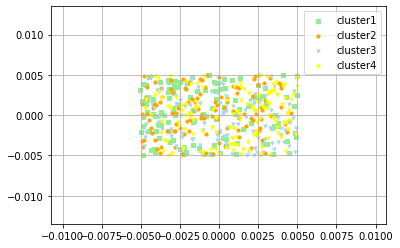

In [86]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [87]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 부정

122

In [88]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 인플

116

In [89]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 투자

105

In [90]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 제도

132

In [91]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 2 # 부정
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 6 # 인플
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 12 # 투자
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 10 # 제도

In [92]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [93]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [94]:
kmeans.inertia_

0.38132749029938745

In [95]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 0 3 3 3 2 2 2 1 0 1 0 3 1 2 0 1 2 2 1 2 1 2 2 2 3 0 2 1 3 2 2 2 0 3 0 1
 0 2 1 2 3 1 0 3 3 3 0 1 0 2 1 0 3 1 2 2 3 0 1 2 2 1 2 1 2 0 3 1 2 0 0 1 3
 3 0 1 3 3 2 0 3 3 2 2 2 3 0 3 1 0 3 2 0 0 2 2 3 2 2 3 1 0 0 3 1 2 1 3 1 1
 2 2 3 2 0 0 0 1 0 2 3 2 1 1 0 1 3 0 0 2 0 2 1 0 3 2 2 0 3 1 3 1 2 2 0 0 0
 1 0 2 0 0 0 2 2 2 0 2 3 3 2 0 2 2 2 2 1 3 0 0 1 3 1 1 3 2 2 3 1 0 3 3 0 2
 2 2 2 1 1 2 3 3 3 1 2 0 3 3 3 2 0 3 1 2 1 1 2 3 3 2 0 1 1 0 2 3 0 1 3 0 3
 0 3 2 1 2 3 2 0 0 0 2 0 3 3 1 0 2 0 2 1 3 3 1 3 1 0 2 0 2 2 1 0 0 2 3 2 2
 1 0 2 1 2 2 0 2 3 2 0 3 0 0 3 0 1 2 3 0 2 0 2 3 3 2 0 3 3 2 2 2 2 3 3 1 1
 3 2 3 1 0 2 3 0 2 0 0 1 1 2 3 2 0 2 2 1 2 3 0 0 3 3 2 0 0 3 0 3 3 3 0 0 3
 2 3 1 1 2 3 3 0 3 0 1 1 0 2 1 0 2 3 1 2 2 1 1 2 2 3 1 3 0 1 0 1 1 3 3 3 1
 1 1 2 3 3 3 0 1 0 0 0 2 0 1 2 1 1 3 0 1 1 3 3 2 3 3 0 2 3 0 3 1 0 0 2 0 0
 3 0 2 1 3 1 3 2 0 1 2 1 2 3 1 0 0 1 3 0 3 2 3 1 2 3 1 3 0 0 2 3 3 3 0 0 3
 0 2 0 2 2 0 3 1 2 3 2 2 1 1 0 0 2 3 2 2 0 2 0 0 3 2 2 3 0 3 1]


In [96]:
cluster_values= list(model.wv.vocab)

In [97]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-0.3813275


In [98]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [99]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.010679345


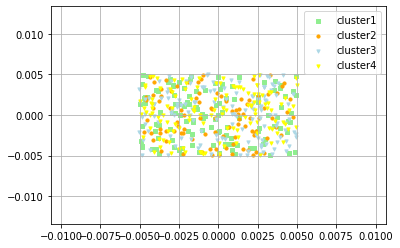

In [100]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [101]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [102]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [103]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [104]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [105]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [106]:
import scipy.spatial.distance as dist

In [107]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [108]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [109]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1,"[-0.0028116244357079268, -0.003946566954255104...",bitcoin,0,"[-0.0004795289, -0.00014280758, -0.00045570842...",0.027372,0.861527,0.165845,NaN
380,"[-0.0025190417654812336, -0.00431408965960145,...",decentralize,0,"[-0.0004795289, -0.00014280758, -0.00045570842...",0.027527,0.064293,0.963234,NaN
47,"[-0.00374648068100214, -0.004760527517646551, ...",time,0,"[-0.0004795289, -0.00014280758, -0.00045570842...",0.028537,0.064293,0.964244,NaN
214,"[9.203575609717518e-05, 0.003231930546462536, ...",work,0,"[-0.0004795289, -0.00014280758, -0.00045570842...",0.028577,0.051434,0.977143,NaN
43,"[-0.0018032985972240567, 0.0043858750723302364...",invest,0,"[-0.0004795289, -0.00014280758, -0.00045570842...",0.029163,0.051434,0.977729,NaN
93,"[-0.004666015971451998, 0.0014358069747686386,...",currency,0,"[-0.0004795289, -0.00014280758, -0.00045570842...",0.025659,0.038576,0.987083,NaN
260,"[0.003957053646445274, -0.001568451290950179, ...",coin,0,"[-0.0004795289, -0.00014280758, -0.00045570842...",0.026299,0.038576,0.987723,NaN
396,"[-0.0048155393451452255, -0.003818664932623505...",something,0,"[-0.0004795289, -0.00014280758, -0.00045570842...",0.027357,0.038576,0.988782,NaN
446,"[-0.0031801334116607904, 0.004100623074918985,...",firm,0,"[-0.0004795289, -0.00014280758, -0.00045570842...",0.026525,0.025717,1.000808,NaN
466,"[0.004781111143529415, 0.002950232243165374, -...",amaze,0,"[-0.0004795289, -0.00014280758, -0.00045570842...",0.026731,0.025717,1.001013,NaN


In [110]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
16,"[-0.0012249654391780496, 0.0015631483402103186...",http,1,"[-0.00023236152, -0.00027941962, -0.0003136327...",0.027192,0.128586,0.898606,NaN
51,"[0.0006789299659430981, -0.0014775828458368778...",make,1,"[-0.00023236152, -0.00027941962, -0.0003136327...",0.028638,0.090010,0.938628,NaN
48,"[0.0008452459005638957, -0.004815422929823399,...",drop,1,"[-0.00023236152, -0.00027941962, -0.0003136327...",0.027228,0.064293,0.962935,NaN
42,"[-0.0028086230158805847, -0.002022922504693269...",investor,1,"[-0.00023236152, -0.00027941962, -0.0003136327...",0.028602,0.064293,0.964308,NaN
76,"[-0.0043640234507620335, 0.004688426852226257,...",term,1,"[-0.00023236152, -0.00027941962, -0.0003136327...",0.029030,0.064293,0.964737,NaN
347,"[-0.004583092872053385, 0.0019097214099019766,...",dominance,1,"[-0.00023236152, -0.00027941962, -0.0003136327...",0.027680,0.051434,0.976245,NaN
336,"[-0.002224933123216033, -0.004769588354974985,...",value,1,"[-0.00023236152, -0.00027941962, -0.0003136327...",0.029071,0.051434,0.977636,NaN
179,"[-0.0033316502813249826, -0.003214798634871840...",pomp,1,"[-0.00023236152, -0.00027941962, -0.0003136327...",0.029853,0.051434,0.978418,NaN
101,"[-0.003622885327786207, 0.003240966470912099, ...",many,1,"[-0.00023236152, -0.00027941962, -0.0003136327...",0.029924,0.051434,0.978489,NaN
126,"[0.001300193602219224, 0.0007566518033854663, ...",want,1,"[-0.00023236152, -0.00027941962, -0.0003136327...",0.029945,0.051434,0.978510,NaN


In [111]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(40,'score')  # 거래소,돈 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
6,"[-0.0050488924607634544, 0.0031576037872582674...",trade,2,"[0.0003490101, 0.00018618611, -0.0002649688, 0...",0.028232,0.077152,0.951080,NaN
136,"[0.0004591807664837688, -0.0029610423371195793...",price,2,"[0.0003490101, 0.00018618611, -0.0002649688, 0...",0.028906,0.077152,0.951754,NaN
322,"[0.004745435900986195, 0.002587593626230955, 0...",security,2,"[0.0003490101, 0.00018618611, -0.0002649688, 0...",0.026144,0.064293,0.961851,NaN
23,"[0.002733594737946987, 0.0005827842396683991, ...",start,2,"[0.0003490101, 0.00018618611, -0.0002649688, 0...",0.029203,0.064293,0.964910,NaN
32,"[-0.003831323003396392, -0.0009022256126627326...",year,2,"[0.0003490101, 0.00018618611, -0.0002649688, 0...",0.027572,0.051434,0.976137,NaN
155,"[0.0018060453003272414, -0.004913893528282642,...",people,2,"[0.0003490101, 0.00018618611, -0.0002649688, 0...",0.028661,0.051434,0.977226,NaN
240,"[-0.0016285113524645567, -0.000600514234974980...",tweet,2,"[0.0003490101, 0.00018618611, -0.0002649688, 0...",0.026571,0.038576,0.987995,NaN
314,"[0.0011187783675268292, -7.34107379685156e-05,...",triangle,2,"[0.0003490101, 0.00018618611, -0.0002649688, 0...",0.026740,0.038576,0.988165,NaN
337,"[0.0021594075951725245, -0.000554288795683533,...",need,2,"[0.0003490101, 0.00018618611, -0.0002649688, 0...",0.026871,0.038576,0.988296,NaN
154,"[0.003586676437407732, 1.6726240573916584e-05,...",thing,2,"[0.0003490101, 0.00018618611, -0.0002649688, 0...",0.027047,0.038576,0.988471,NaN


In [112]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
67,"[0.0025634493213146925, 0.004990552086383104, ...",market,3,"[-0.00025501015, 0.0003871974, 0.0003574809, -...",0.027235,0.064293,0.962942,NaN
41,"[0.0025574476458132267, 0.002586130052804947, ...",institutional,3,"[-0.00025501015, 0.0003871974, 0.0003574809, -...",0.028258,0.064293,0.963965,NaN
97,"[0.0011417190544307232, -0.0034942813217639923...",hash,3,"[-0.00025501015, 0.0003871974, 0.0003574809, -...",0.026787,0.051434,0.975353,NaN
168,"[-0.00213445327244699, -0.004587944131344557, ...",important,3,"[-0.00025501015, 0.0003871974, 0.0003574809, -...",0.028218,0.051434,0.976784,NaN
25,"[-0.0004812758998014033, -5.611926462734118e-0...",sell,3,"[-0.00025501015, 0.0003871974, 0.0003574809, -...",0.028828,0.051434,0.977393,NaN
175,"[0.00267230486497283, -0.004882733803242445, -...",link,3,"[-0.00025501015, 0.0003871974, 0.0003574809, -...",0.030440,0.051434,0.979005,NaN
374,"[-0.00013147693243809044, 0.003998886793851852...",decline,3,"[-0.00025501015, 0.0003871974, 0.0003574809, -...",0.028385,0.038576,0.989809,NaN
78,"[-0.002937674056738615, 0.0027771389577537775,...",week,3,"[-0.00025501015, 0.0003871974, 0.0003574809, -...",0.029190,0.038576,0.990614,NaN
221,"[-0.0038532644975930452, -0.000212868661037646...",potential,3,"[-0.00025501015, 0.0003871974, 0.0003574809, -...",0.029399,0.038576,0.990823,NaN
202,"[-0.0025020085740834475, -0.001594223431311547...",post,3,"[-0.00025501015, 0.0003871974, 0.0003574809, -...",0.029896,0.038576,0.991320,NaN


In [117]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #투자

121

In [118]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #인플

96

In [119]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #거래소

135

In [120]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #투자

123

In [121]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 11 # 투자
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 6 # 인플
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 12 # 거래소
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 11 # 투자

In [122]:
temp_cluster_result1['result'] = 2 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 2
temp_cluster_result1['Silhouette'] = 0.010679345# 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.010679345

In [123]:
temp_cluster_result1.to_csv("../cluster/twitter/twitter_2019_down3_euclidean.csv")
temp_cluster_result.to_csv("../cluster/twitter/twitter_2019_down3_cosine.csv")

In [93]:
word_vectors = model.wv

In [94]:
vocabs = word_vectors.vocab.keys()

In [95]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [96]:
print(word_vectors.similarity(w1='little',w2='push'))

0.99857104


In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [98]:
xys

array([[ 1.91762854e+00,  1.00464941e-04],
       [ 2.41042694e-01,  1.30420782e-03],
       [ 1.59111222e+00,  3.57644364e-03],
       ...,
       [-3.11496146e-01,  2.03772445e-03],
       [-3.11973668e-01,  2.79474988e-03],
       [-2.83442870e-01, -1.34272206e-03]])

In [99]:
xys[:,0]

array([ 1.91762854,  0.24104269,  1.59111222, ..., -0.31149615,
       -0.31197367, -0.28344287])

In [100]:
xys[:,1]

array([ 0.00010046,  0.00130421,  0.00357644, ...,  0.00203772,
        0.00279475, -0.00134272])

In [101]:
xs = xys[:,0]
ys = xys[:,1]

In [102]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

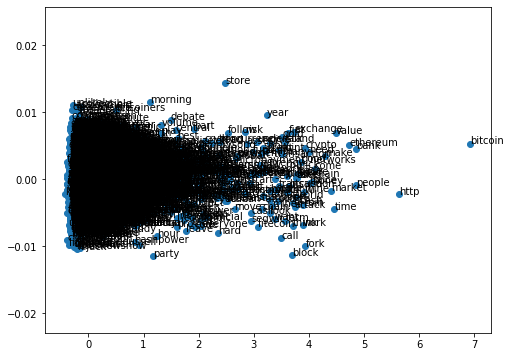

In [103]:
plot_2d_graph(vocabs,xs,ys)

In [100]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>